# ML for Business Analytics Project

##**1.Business Understanding:**

In this project we are developing a system whose main goal is to predict mortality among patients. At this stage, the data used are methodical and not real data. During the project we will apply different machine learning methods that we learned during the course. The project maihealthcaregoal is to allow health care providers to save human lives by receiving the abnormal indicators in the time interval of the patient's life expectancy and the degree of deterioration in his condition using the indicators we will define.

At a more advanced stage of the system, we would like to be able to activate automatic alerts upon detection of an unusual change in the data that puts the patient at risk. This will enable life-saving treatment that is optimally adapted to the patients' needs.


##**2.Data Understanding:**

The foundation of our project lies in the utilization of large amounts of data, which we will analyze using various machine learning techniques. By leveraging the power of data, we aim to develop a system that can provide early indications of abnormalities in patients' conditions

The rationale behind employing a data-driven approach is rooted in the belief that patterns and insights can be derived from the analysis of extensive datasets. By systematically examining historical patient data and identifying correlations, trends, and anomalies, we can construct predictive models that capture important indicators of mortality risk.

Although there is no certainty regarding the results of the project at this stage, we have confidence in its feasibility and importance due to several factors:

1.   Availability of methodical data: Although the data used in this project is methodical and not real, it serves as a representation of real-world patient information. By working with this simulated dataset, we can test and refine our models before applying them to real patient data. This ensures that our system is well prepared and validated before deployment.

2.   Existing machine learning methods: during the course we acquired knowledge and skills in various machine learning techniques. We will leverage this knowledge to research and implement algorithms suitable for mortality prediction.

3.   Potential for early detection and intervention: By leveraging the power of data and machine learning, we can analyze patient indicators and historical records to identify subtle changes that may indicate an increased risk of mortality. Timely recognition of these changes can motivate health care providers to intervene and provide life-saving treatments tailored to the specific needs of each patient.

The variables in the data that the model is expected to learn are columns selected by a trained medical team that accompanies the project and prioritizes features that most affect our target variable - mortality.

Note: We understand that the optimal situation would be to allow the machine to learn all the information found in the health insurance fund, but unfortunately this is not possible for us. We take into account possible bias for this reason.


**Preliminary investigation of the data received**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from matplotlib import cm
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.tree import export_text
from sklearn.pipeline import make_pipeline, Pipeline



In [ ]:
try:
    generated_data = pd.read_excel('generated_data.xlsx')
except:
    print("Error.")

In [ ]:
generated_data.head()

,Unnamed: 0,date,Patient Number,age,sex,weight,height,S/P MI,S/P CABG,Heart failure,...,Dose,Xarelto,Dose.1,Pradaxa,Dose.2,Coumadin,Dose.3,Fried Scale,isDead,deathReason
0,0,2005-06-30,1,75,1.0,59.306449,151.0,0.0,0.0,0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,4.0,0,NaN
1,1,2005-07-08,1,75,1.0,59.970350,151.0,1.0,0.0,1,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,3.0,0,NaN
2,2,2005-10-24,1,75,1.0,64.119390,151.0,0.0,0.0,1,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,5.0,0,NaN
3,3,2006-01-08,1,75,1.0,68.149578,151.0,1.0,0.0,1,...,NaN,0.0,20.0,0.0,NaN,0.0,NaN,4.0,0,NaN
4,4,2006-02-02,1,75,1.0,66.977856,151.0,1.0,0.0,0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,0,NaN


In [ ]:
generated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                50000 non-null  int64         
 1   date                      50000 non-null  datetime64[ns]
 2   Patient Number            50000 non-null  int64         
 3   age                       50000 non-null  int64         
 4   sex                       49972 non-null  float64       
 5   weight                    50000 non-null  float64       
 6   height                    49944 non-null  float64       
 7   S/P MI                    49333 non-null  float64       
 8   S/P CABG                  49341 non-null  float64       
 9   Heart failure             49382 non-null  object        
 10  EF%                       49074 non-null  float64       
 11  HTN                       49362 non-null  float64       
 12  DM                

In [ ]:
generated_data.describe()


,Unnamed: 0,Patient Number,age,sex,weight,height,S/P MI,S/P CABG,EF%,HTN,...,Aldactone/Spironolactone,Eliquis,Dose,Xarelto,Dose.1,Pradaxa,Coumadin,Dose.3,Fried Scale,isDead
count,50000.000000,50000.000000,50000.000000,49972.000000,50000.000000,49944.000000,49333.000000,49341.000000,49074.000000,49362.000000,...,49307.000000,49365.000000,15364.000000,49335.000000,1993.000000,49339.000000,49303.000000,1076.000000,49839.000000,50000.000000
mean,24999.500000,149.122140,81.200640,0.605819,72.719863,165.215621,0.555125,0.173689,51.341912,0.958571,...,0.092989,0.308944,3.699883,0.041877,16.176618,0.022923,0.023528,4.598048,2.099661,0.000680
std,14433.901067,88.536757,6.934198,0.488679,13.744402,9.357194,0.496957,0.378846,13.401539,0.199281,...,0.290420,0.462063,1.249036,0.200310,5.561622,0.149660,0.151575,0.918748,1.314778,0.026068
min,0.000000,1.000000,65.000000,0.000000,34.086791,100.000000,0.000000,0.000000,10.000000,0.000000,...,0.000000,0.000000,2.500000,0.000000,5.000000,0.000000,0.000000,2.500000,0.000000,0.000000
25%,12499.750000,67.000000,76.000000,0.000000,62.648973,158.000000,0.000000,0.000000,40.000000,1.000000,...,0.000000,0.000000,2.500000,0.000000,15.000000,0.000000,0.000000,5.000000,1.000000,0.000000
50%,24999.500000,147.000000,81.000000,1.000000,73.049754,166.000000,1.000000,0.000000,60.000000,1.000000,...,0.000000,0.000000,2.500000,0.000000,20.000000,0.000000,0.000000,5.000000,2.000000,0.000000
75%,37499.250000,228.000000,87.000000,1.000000,82.544289,172.000000,1.000000,0.000000,60.000000,1.000000,...,0.000000,1.000000,5.000000,0.000000,20.000000,0.000000,0.000000,5.000000,3.000000,0.000000
max,49999.000000,300.000000,99.000000,1.000000,116.151808,183.000000,1.000000,1.000000,68.000000,1.000000,...,1.000000,1.000000,5.000000,1.000000,20.000000,1.000000,1.000000,5.000000,5.000000,1.000000


Displays the number of tests performed by each patient. Additionally shows the average and standard deviation of the number of tests in the data

In [ ]:
print(generated_data['Patient Number'].value_counts())
print()
generated_data.groupby('Patient Number')['Patient Number'].value_counts().agg([np.mean,np.std])

145    560
153    560
65     560
61     560
207    560
      ... 
102     28
163     28
162     28
161     28
78      28
Name: Patient Number, Length: 238, dtype: int64



mean    210.084034
std     186.145698
Name: Patient Number, dtype: float64

The number of patients who died by age


In [ ]:
death = generated_data.loc[generated_data['isDead'] == 1]
death_sorted = death.sort_values('age', ascending=True)
result = death_sorted.groupby('age').size()
result

age
65    1
68    2
70    2
72    1
75    6
76    1
77    2
78    3
79    2
81    2
82    1
83    4
85    1
87    2
88    1
90    2
91    1
dtype: int64

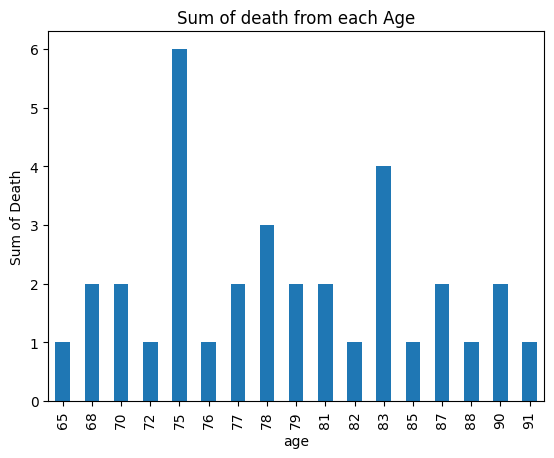

In [ ]:
result.plot(kind='bar', legend=None)
plt.xlabel('age')
plt.ylabel('Sum of Death')
plt.title('Sum of death from each Age')
plt.show()

In [ ]:
men_died = generated_data[(generated_data['isDead'] == 1) & (generated_data['sex'] == 1)].shape[0]
women_died = generated_data[(generated_data['isDead'] == 1) & (generated_data['sex'] == 0)].shape[0]

# Display the results
print("Number of men who died:", men_died)
print("Number of women who died:", women_died)


Number of men who died: 22
Number of women who died: 12


## First insights from the Data Understanding

- It can be seen that our sample includes a majority of men (about 60%). We will also note that the number of men who died is about 54% higher than the number of women who died. This figure is consistent with several studies we have read that claim that men have higher chances of fracture and death.
- It can be seen that there is no significant relationship between age and death. Nevertheless, we notice a small age range with a higher chance of death (ages 75-83).
- The average number of tests per patient was quite high (210), but the standard deviation was also high (186). That is, some patients did a lot of tests and some patients hardly did any. We will have to decide what is the minimum threshold for the amount of tests that we would like to refer to in order to get a lower standard deviation.

## 3.Data Preparation

### Feature Engineering

Checking for empty values from the data

In [ ]:
generated_data.isna().sum()

Unnamed: 0                      0
date                            0
Patient Number                  0
age                             0
sex                            28
weight                          0
height                         56
S/P MI                        667
S/P CABG                      659
Heart failure                 618
EF%                           926
HTN                           638
DM                            687
Dyslipidemia                  629
CVA/TIA                       663
PVD                           676
Moderate-Severe AS            664
Moderate-Severe AR            611
Moderate-Severe MS            660
Moderate-Severe MR            689
Atrial fibrillation           692
Pacemaker                     635
ICD                           688
CRTD                          664
Smoker                        645
Creatinine                    615
HgB                           630
Albumin                       636
LDL                           675
HDL           

Because there are columns that have a large number of empty values/contain only empty values ​​we get an empty table.
Therefore we will limit throwing empty values ​​to specific columns that have 50%+ of their values ​​empty.

In [ ]:
res = generated_data.isnull().sum()
res[res > 25000]

NT-proBNP      48812
Dose           34636
Dose.1         48007
Dose.2         48775
Dose.3         48924
deathReason    49967
dtype: int64

Drop all 50%+ Null value columns

In [ ]:
generated_data.drop(['NT-proBNP', 'Dose','Dose.1', 'Dose.2', 'Dose.3','deathReason'],axis='columns', inplace=True)
generated_data.head()

,Unnamed: 0,date,Patient Number,age,sex,weight,height,S/P MI,S/P CABG,Heart failure,...,Entresto,Jardiance/forxiga,Fusid,Aldactone/Spironolactone,Eliquis,Xarelto,Pradaxa,Coumadin,Fried Scale,isDead
0,0,2005-06-30,1,75,1.0,59.306449,151.0,0.0,0.0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,0
1,1,2005-07-08,1,75,1.0,59.970350,151.0,1.0,0.0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0
2,2,2005-10-24,1,75,1.0,64.119390,151.0,0.0,0.0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0
3,3,2006-01-08,1,75,1.0,68.149578,151.0,1.0,0.0,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,0
4,4,2006-02-02,1,75,1.0,66.977856,151.0,1.0,0.0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0


Erasing errors in the data

In [ ]:
generated_data['Heart failure'].value_counts()

1           32295
0           16725
אין אקו       362
Name: Heart failure, dtype: int64

In [ ]:
errors = ['Heart failure', 'Creatinine', 'HgB', 'Albumin', 'LDL', 'HDL', 'TG']

for des in errors:
    ero = generated_data[des].str.extract(pat='(\w+)', expand=False)
    generated_data.drop(ero[~ero.isna()].index, inplace=True)

In [ ]:
generated_data['Heart failure'].value_counts()

1    30900
0    16043
Name: Heart failure, dtype: int64

Converts all values ​​in the categorical column to uppercase - in order to produce uniformity

In [ ]:
generated_data['Statins.1'] = generated_data['Statins.1'].apply(lambda x: ''.join([i.upper() if i.isalpha() else i for i in str(x)]))
generated_data['Statins.1'].value_counts()

NAN                   9824
LIPITOR 40            5822
LIPITOR 20            4974
LIPITOR 80            2011
LIPITOR 10            1631
                      ... 
SIMVACOR 40            144
SIMVAXON 20            141
ROSUVASTATIN 10 MG     139
SIMACOR 40             139
ATOZET10/20            137
Name: Statins.1, Length: 68, dtype: int64

After various operations on the data (empty values ​​and the errors) we will split it into two sets. The first set will be the target ranking - a binary column (mortality).
The second set will be all the explanatory variables

In [ ]:
y = generated_data["isDead"]
y.head()

0    0
1    0
2    0
4    0
5    0
Name: isDead, dtype: int64

In [ ]:
y.value_counts()

0    47503
1       34
Name: isDead, dtype: int64

In [ ]:
generated_df = generated_data.copy()
generated_df.drop(['Patient Number','isDead','Unnamed: 0','date'],axis='columns', inplace=True)
generated_df.head()

,age,sex,weight,height,S/P MI,S/P CABG,Heart failure,EF%,HTN,DM,...,Statins.1,Entresto,Jardiance/forxiga,Fusid,Aldactone/Spironolactone,Eliquis,Xarelto,Pradaxa,Coumadin,Fried Scale
0,75,1.0,59.306449,151.0,0.0,0.0,0,20.0,1.0,1.0,...,LIPITOR 40,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0
1,75,1.0,59.970350,151.0,1.0,0.0,1,40.0,1.0,0.0,...,ATOZIT 10/20,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
2,75,1.0,64.119390,151.0,0.0,0.0,1,60.0,1.0,0.0,...,EZETROL 10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4,75,1.0,66.977856,151.0,1.0,0.0,0,60.0,1.0,0.0,...,LIPITOR 80,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,75,1.0,68.823750,151.0,1.0,0.0,1,25.0,1.0,0.0,...,NAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
empty_columns_values = generated_df.columns[generated_df.isnull().any()].tolist()
empty_columns_values

['sex',
 'height',
 'S/P MI',
 'S/P CABG',
 'Heart failure',
 'EF%',
 'HTN',
 'DM',
 'Dyslipidemia',
 'CVA/TIA',
 'PVD',
 'Moderate-Severe AS',
 'Moderate-Severe AR',
 'Moderate-Severe MS',
 'Moderate-Severe MR',
 'Atrial fibrillation',
 'Pacemaker',
 'ICD',
 'CRTD',
 'Smoker',
 'Creatinine',
 'HgB',
 'Albumin',
 'LDL',
 'HDL',
 'TG',
 'Aspirin',
 'Plavix',
 'Brilinta',
 'Effient',
 'ACEI',
 'ARB',
 'BB',
 'Statins',
 'Entresto',
 'Jardiance/forxiga',
 'Fusid',
 'Aldactone/Spironolactone',
 'Eliquis',
 'Xarelto',
 'Pradaxa',
 'Coumadin',
 'Fried Scale']

Unfortunately, there is still a large amount of empty values ​​in the data. Because the meaning of a blank value is not an abnormal result but a lack of performing a certain test, we will not delete these cells. We will handle them by completing theier mean value of each column.

In [ ]:
imputer = SimpleImputer(strategy="mean")
generated_df[empty_columns_values] = imputer.fit_transform(generated_df[empty_columns_values])

In [ ]:
generated_df.isnull().sum()

age                         0
sex                         0
weight                      0
height                      0
S/P MI                      0
S/P CABG                    0
Heart failure               0
EF%                         0
HTN                         0
DM                          0
Dyslipidemia                0
CVA/TIA                     0
PVD                         0
Moderate-Severe AS          0
Moderate-Severe AR          0
Moderate-Severe MS          0
Moderate-Severe MR          0
Atrial fibrillation         0
Pacemaker                   0
ICD                         0
CRTD                        0
Smoker                      0
Creatinine                  0
HgB                         0
Albumin                     0
LDL                         0
HDL                         0
TG                          0
Aspirin                     0
Plavix                      0
Brilinta                    0
Effient                     0
ACEI                        0
ARB       

Note:

We would save a dataframe copy for the pipeline function in the future.

In [ ]:
generated_df_for_pipeline = generated_df.copy()

In [ ]:
label_encoder = LabelEncoder()
generated_df['Statins.1'] = label_encoder.fit_transform(generated_df['Statins.1'])
generated_df.head()

,age,sex,weight,height,S/P MI,S/P CABG,Heart failure,EF%,HTN,DM,...,Statins.1,Entresto,Jardiance/forxiga,Fusid,Aldactone/Spironolactone,Eliquis,Xarelto,Pradaxa,Coumadin,Fried Scale
0,75,1.0,59.306449,151.0,0.0,0.0,0.0,20.0,1.0,1.0,...,33,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0
1,75,1.0,59.970350,151.0,1.0,0.0,1.0,40.0,1.0,0.0,...,16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
2,75,1.0,64.119390,151.0,0.0,0.0,1.0,60.0,1.0,0.0,...,28,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4,75,1.0,66.977856,151.0,1.0,0.0,0.0,60.0,1.0,0.0,...,36,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,75,1.0,68.823750,151.0,1.0,0.0,1.0,25.0,1.0,0.0,...,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Feature Selection Algorithms

We will compare between two models for selecting the most important features. Random Forest and RFE

In order not to create a bias between the results of the models, we will use the same dataframes of training data and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(generated_df, y, random_state=0, test_size=0.25)

RFE: Recursive Feature Elimination

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


clf = DecisionTreeRegressor(random_state=0)
rfe = RFE(estimator=clf, n_features_to_select=15)
rfe.fit(X_train, y_train)
print("selected Features", X_train.columns[rfe.support_])

selected Features Index(['age', 'weight', 'height', 'S/P CABG', 'EF%', 'Atrial fibrillation',
       'CRTD', 'Creatinine', 'HgB', 'Albumin', 'LDL', 'HDL', 'TG', 'ARB',
       'Statins.1'],
      dtype='object')


Random Forest:

In [ ]:
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=1)
RF.fit(X_train,y_train)
importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": RF.feature_importances_
})
importances = importances.sort_values("Importance", ascending=False)
importances

,Feature,Importance
3,height,0.112351
0,age,0.103115
23,HgB,0.101196
24,Albumin,0.088197
25,LDL,0.080108
27,TG,0.068558
7,EF%,0.060812
26,HDL,0.060363
2,weight,0.057655
22,Creatinine,0.053695


we will use comparison function for chosing the optimal hyperparameters:

We chose the Random Forest method to continue classifying the most significant variables for the model.
Now we would like to specify the optimal tree depth,numober of trees (estimators) and thershold value for the data classification model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def evaluate_RF(X_train, y_train, n_estimators, max_depth=[2,4,8,16,32,64,128,254], scoring='accuracy'):
    res = {}
    for md in max_depth:
        rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=md, random_state=1)
        res['rf_'+str(md)] = np.mean(cross_val_score(rf,X_train,y_train,cv=3,scoring=scoring))
    return res

In [ ]:
evaluate_RF(X_train, y_train, 200)

{'rf_2': 0.999354874901829,
 'rf_4': 0.999354874901829,
 'rf_8': 0.999354874901829,
 'rf_16': 0.999354874901829,
 'rf_32': 0.999354874901829,
 'rf_64': 0.999354874901829,
 'rf_128': 0.999354874901829,
 'rf_254': 0.999354874901829}

From the results we received it can be recognized that the value of the result is preserved and therefore we will prefer to use a tree depth as small as possible. This will allow efficiency, speed and economy of calculation resources for the model while maintaining an ideal result.

Now we would like to find the ideal number of trees for the model. This hyperparameter is called "number of estimators".

In [ ]:
def evaluate_n_estimators_RF(X_train, y_train, n_estimators=[50,100,150,200,250,350,400,450,500],max_depth=2 ,scoring='accuracy'):
    res = {}
    for ne in n_estimators:
        rf = RandomForestClassifier(n_estimators=ne, random_state=1)
        res['rf_'+str(ne)] = np.mean(cross_val_score(rf,X_train,y_train,cv=3,scoring=scoring))
    return res

In [ ]:
evaluate_n_estimators_RF(X_train, y_train, max_depth=2)

{'rf_50': 0.999354874901829,
 'rf_100': 0.999354874901829,
 'rf_150': 0.999354874901829,
 'rf_200': 0.999354874901829,
 'rf_250': 0.999354874901829,
 'rf_350': 0.999354874901829,
 'rf_400': 0.999354874901829,
 'rf_450': 0.999354874901829,
 'rf_500': 0.999354874901829}

From the results we received it can be recognized that the value of the result is preserved and therefore we will prefer to use as few trees as possible. This will allow efficiency, prevention of overfitting, speed and saving of calculation resources for the model while maintaining an ideal result.

In [ ]:
RF = RandomForestClassifier(n_estimators=50, max_depth=2, random_state=1)
RF.fit(X_train,y_train)
importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": RF.feature_importances_
})
importances = importances.sort_values("Importance", ascending=False)
importances

,Feature,Importance
23,HgB,0.128794
24,Albumin,0.095923
3,height,0.093986
27,TG,0.088371
0,age,0.085463
26,HDL,0.075969
7,EF%,0.066577
25,LDL,0.064896
22,Creatinine,0.052925
36,Statins.1,0.032529


Now we would like to find the optimal threshold value for filtering the variables for the model:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def get_features(X, y, threshold):
  RF = RandomForestClassifier(n_estimators=50, max_depth=2, random_state=1)
  RF.fit(X,y)
  importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": RF.feature_importances_
  })
  importances = importances.sort_values("Importance", ascending=False)
  features_selection = importances[importances['Importance']>threshold]
  generated_df_after_Fs = generated_df[features_selection['Feature']]
  return generated_df_after_Fs,threshold

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

def get_RF_accuracy_score(generated_df_after_Fs,threshold):
  x_train,x_test,y_train,y_test = train_test_split(generated_df_after_Fs,y, test_size=0.25, random_state=1)
  RF = RandomForestClassifier()
  RF.fit(x_train, y_train)
  y_pred = RF.predict(x_test)
  accuracy_score = metrics.accuracy_score(y_test, y_pred)
  return accuracy_score

Give the system a list of threshold values ​​and it will output the accuracy values ​​of the model for each threshold:

In [ ]:
new_thresholds = [i / 1000 for i in range(5, 151, 5)]

In [ ]:
for threshold in new_thresholds:
    generated_df_after_Fs, threshold_value = get_features(generated_df, y, threshold)

    if generated_df_after_Fs.empty:
        print(f"No features selected for threshold number {threshold_value}. Stopping the loop.")
        break

    accuracy_score = get_RF_accuracy_score(generated_df_after_Fs, threshold_value)

    if accuracy_score < 0.3:
        print(f"The accuracy score for threshold number {threshold_value} is below 0.3. Stopping the loop.")
        break

    print(f"The accuracy score for threshold number {threshold_value} is: {accuracy_score}")

The accuracy score for threshold number 0.005 is: 0.9994951619688683
The accuracy score for threshold number 0.01 is: 0.9994951619688683
The accuracy score for threshold number 0.015 is: 0.9994951619688683
The accuracy score for threshold number 0.02 is: 0.9994951619688683
The accuracy score for threshold number 0.025 is: 0.9994951619688683
The accuracy score for threshold number 0.03 is: 0.9994951619688683
The accuracy score for threshold number 0.035 is: 0.9994951619688683
The accuracy score for threshold number 0.04 is: 0.9994951619688683
The accuracy score for threshold number 0.045 is: 0.9994951619688683
The accuracy score for threshold number 0.05 is: 0.9994951619688683
The accuracy score for threshold number 0.055 is: 0.9994951619688683
The accuracy score for threshold number 0.06 is: 0.9994951619688683
The accuracy score for threshold number 0.065 is: 0.9994951619688683
The accuracy score for threshold number 0.07 is: 0.9994951619688683
The accuracy score for threshold number 0

The result should give us the optimal threshold score for our data (0.005). In this way, we got an optimal result for as less explanatory columns as possible.
now we will show the final features for our model:

In [ ]:
def get_final_top_features(X, y, threshold):
  RF = RandomForestClassifier(n_estimators=50, max_depth=2, random_state=1)
  RF.fit(X,y)
  importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": RF.feature_importances_
  })
  importances = importances.sort_values("Importance", ascending=False)
  features_selection = importances[importances['Importance']>threshold]
  generated_df_after_Fs = generated_df[features_selection['Feature']]
  return importances[importances['Importance']>threshold]

In [ ]:
top_features = get_final_top_features(generated_df, y, 0.005)
selected_features = top_features['Feature'].tolist()

The new data Frame columns after the feature selection called data_after_Fs

In [ ]:
data_after_Fs = generated_df.copy()
columns_to_drop = [col for col in data_after_Fs.columns if col not in selected_features]
data_after_Fs.drop(columns=columns_to_drop, inplace=True)

In [ ]:
data_after_Fs.head()

,age,sex,weight,height,S/P CABG,Heart failure,EF%,DM,PVD,Moderate-Severe AR,...,LDL,HDL,TG,Plavix,ACEI,ARB,Statins.1,Entresto,Xarelto,Fried Scale
0,75,1.0,59.306449,151.0,0.0,0.0,20.0,1.0,0.000000,0.0,...,73.0,59.0,101.0,0.0,0.000000,1.0,33,0.0,0.0,4.0
1,75,1.0,59.970350,151.0,0.0,1.0,40.0,0.0,0.000000,0.0,...,61.0,50.0,139.0,0.0,1.000000,0.0,16,0.0,0.0,3.0
2,75,1.0,64.119390,151.0,0.0,1.0,60.0,0.0,0.082754,0.0,...,74.0,71.0,75.0,1.0,0.360791,1.0,28,0.0,0.0,5.0
4,75,1.0,66.977856,151.0,0.0,0.0,60.0,0.0,0.000000,0.0,...,53.0,40.0,77.0,0.0,1.000000,0.0,36,1.0,0.0,1.0
5,75,1.0,68.823750,151.0,0.0,1.0,25.0,0.0,0.000000,0.0,...,61.0,47.0,70.0,0.0,0.000000,1.0,44,0.0,0.0,1.0


We will use dimension reduction techniques in the course to convey the idea and try to identify anomalies:

In [ ]:
from sklearn import decomposition
import seaborn as sn
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from pandas.plotting import scatter_matrix
from sklearn import datasets
plt.style.use("bmh")
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def plot_PCA(data, labels):
    pca = decomposition.PCA(n_components = 2)
    pca_data = pca.fit_transform(data)
    pca_data = np.vstack((pca_data.T, labels)).T
    df = pd.DataFrame(data=pca_data, columns=("dim1", "dim2", "Label"))
    sn.FacetGrid(df, hue="Label", height=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
    plt.title("PCA")
    plt.show()

In [ ]:
def plot_tSNE(data, labels, perplexity=[5,20,30,50]):
    kl_divergence_iris = []
    fig, ax = plt.subplots(1, 4, figsize=(40, 8))
    for idx, p in enumerate(perplexity):
        tsne = TSNE(n_components=2, random_state=0, perplexity=p)
        tsne_data = tsne.fit_transform(data)
        kl_divergence_iris.append(tsne.kl_divergence_)
        tsne_data = np.vstack((tsne_data.T, labels)).T
        df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "Label"))
        sn.scatterplot(x=df['dim1'], y=df['dim2'], hue=df["Label"], ax=ax[idx], s=100,palette='colorblind').set_title("t-SNE with perplexity="+str(p))
    plt.show()

PCA

We deleted the categorical column before shrinking the dimensions and visualization in order not to create a bias in the output

In [ ]:
data_after_Fs.drop(['Statins.1'],axis='columns', inplace=True)

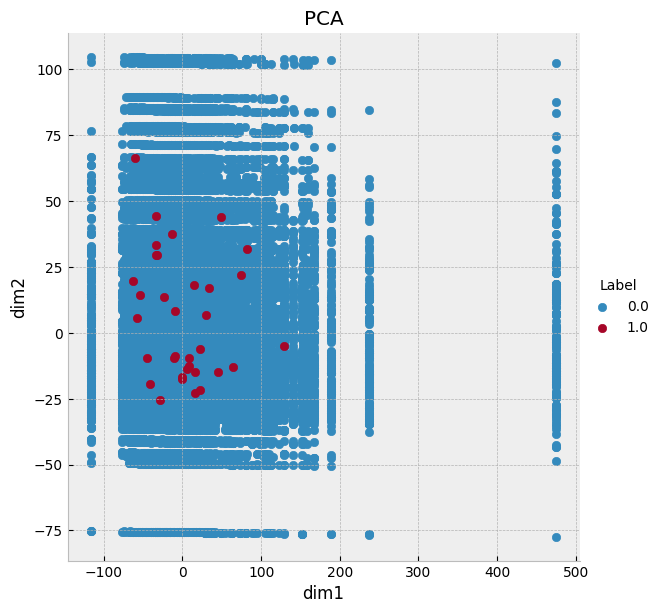

In [ ]:
plot_PCA(data_after_Fs,y)

Note:

We assume that what contributes to the result being very noisy and unclassifiable is that the data has not undergone a normalization process.

T-SNE

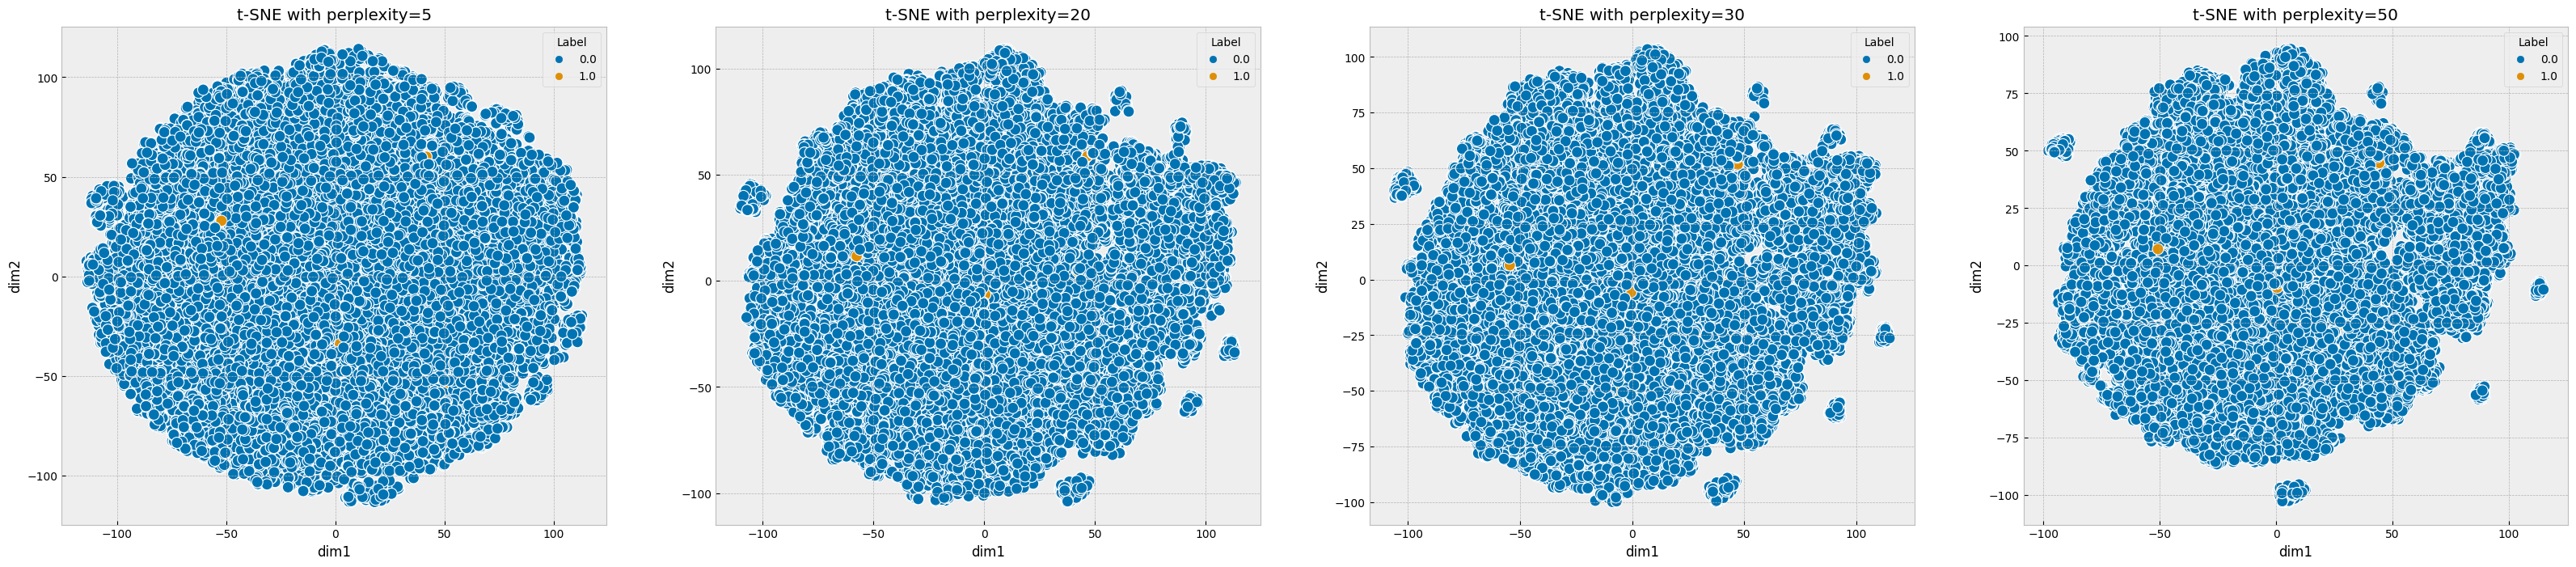

In [ ]:
plot_tSNE(data_after_Fs,y)

### Normalization and Standardization

In [ ]:
data_after_Fs

,age,sex,weight,height,S/P CABG,Heart failure,EF%,DM,PVD,Moderate-Severe AR,...,Albumin,LDL,HDL,TG,Plavix,ACEI,ARB,Entresto,Xarelto,Fried Scale
0,75,1.0,59.306449,151.0,0.0,0.0,20.0,1.0,0.000000,0.0,...,4.20,73.0,59.0,101.0,0.0,0.000000,1.0,0.0,0.0,4.0
1,75,1.0,59.970350,151.0,0.0,1.0,40.0,0.0,0.000000,0.0,...,4.00,61.0,50.0,139.0,0.0,1.000000,0.0,0.0,0.0,3.0
2,75,1.0,64.119390,151.0,0.0,1.0,60.0,0.0,0.082754,0.0,...,3.40,74.0,71.0,75.0,1.0,0.360791,1.0,0.0,0.0,5.0
4,75,1.0,66.977856,151.0,0.0,0.0,60.0,0.0,0.000000,0.0,...,4.10,53.0,40.0,77.0,0.0,1.000000,0.0,1.0,0.0,1.0
5,75,1.0,68.823750,151.0,0.0,1.0,25.0,0.0,0.000000,0.0,...,4.10,61.0,47.0,70.0,0.0,0.000000,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,90,1.0,73.336318,158.0,0.0,0.0,60.0,1.0,0.000000,0.0,...,3.90,154.0,63.0,157.0,0.0,0.000000,0.0,0.0,0.0,2.0
49996,90,1.0,75.462573,158.0,0.0,1.0,60.0,0.0,0.000000,0.0,...,3.76,68.0,54.0,96.0,0.0,0.000000,0.0,0.0,0.0,2.0
49997,90,1.0,82.255023,158.0,1.0,1.0,60.0,0.0,0.000000,0.0,...,3.70,61.0,36.0,61.0,0.0,0.000000,0.0,0.0,0.0,1.0
49998,90,1.0,83.482713,158.0,0.0,1.0,65.0,0.0,0.000000,0.0,...,3.70,89.0,49.0,52.0,0.0,0.000000,0.0,0.0,0.0,4.0


In [ ]:
scaler = MinMaxScaler()
column_names = data_after_Fs.columns
data_scaled = scaler.fit_transform(data_after_Fs)
data_scaled = pd.DataFrame(data_scaled, columns=column_names)

In [ ]:
data_scaled.head()

,age,sex,weight,height,S/P CABG,Heart failure,EF%,DM,PVD,Moderate-Severe AR,...,Albumin,LDL,HDL,TG,Plavix,ACEI,ARB,Entresto,Xarelto,Fried Scale
0,0.294118,1.0,0.307313,0.614458,0.0,0.0,0.172414,1.0,0.000000,0.0,...,0.875000,0.405556,0.655556,0.170897,0.0,0.000000,1.0,0.0,0.0,0.8
1,0.294118,1.0,0.315403,0.614458,0.0,1.0,0.517241,0.0,0.000000,0.0,...,0.833333,0.338889,0.555556,0.235195,0.0,1.000000,0.0,0.0,0.0,0.6
2,0.294118,1.0,0.365961,0.614458,0.0,1.0,0.862069,0.0,0.082754,0.0,...,0.708333,0.411111,0.788889,0.126904,1.0,0.360791,1.0,0.0,0.0,1.0
3,0.294118,1.0,0.400793,0.614458,0.0,0.0,0.862069,0.0,0.000000,0.0,...,0.854167,0.294444,0.444444,0.130288,0.0,1.000000,0.0,1.0,0.0,0.2
4,0.294118,1.0,0.423286,0.614458,0.0,1.0,0.258621,0.0,0.000000,0.0,...,0.854167,0.338889,0.522222,0.118443,0.0,0.000000,1.0,0.0,0.0,0.2


### Pipelines

In [ ]:
%matplotlib inline
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
import numpy as np

In [ ]:
def build_pipeline(regressor, categorical, scaling=False):
    cat_pipe = make_pipeline(OrdinalEncoder())
    num_pipe = make_pipeline(SimpleImputer(strategy='mean'))

    if scaling:
        num_pipe.steps.insert(1, ["scaler", StandardScaler()])

    transform = make_column_transformer((cat_pipe, categorical), remainder=num_pipe)

    return Pipeline(steps=[('preprocess', transform), ('reg', regressor)])

In [ ]:
generated_df_for_pipeline.shape

(47537, 46)

In [ ]:
y.shape

(47537,)

In [ ]:
#generated_df_for_pipeline
#y

columns_to_drop = [col for col in generated_df_for_pipeline.columns if col not in selected_features]
generated_df_for_pipeline.drop(columns=columns_to_drop, inplace=True)
regressor = RandomForestClassifier()
categorical = ['Statins.1']
pipeline = build_pipeline(regressor, categorical, scaling=True)

In [ ]:
scores = cross_val_score(pipeline, generated_df_for_pipeline, y)
print("Cross-validated R^2 score for {}: {:.2f}".format(regressor.__class__.__name__, scores.mean()))

Cross-validated R^2 score for RandomForestClassifier: 1.00


##**5. Modeling:**

### Model Selection

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from tqdm.notebook import tqdm as tqdm

In [ ]:
### Model solution
models = [RandomForestClassifier(), GradientBoostingClassifier(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier(),GaussianNB()]
for m in tqdm(models): # nstantly make your loops show a smart progress meter
    pipe = build_pipeline(m,categorical)
    scores = cross_val_score(pipe, generated_df_for_pipeline, y)
    print("R^2 score for {}: {:.2f}".format(m.__class__.__name__, scores.mean()))
    pipe = build_pipeline(m,categorical, scaling=True)
    scores = cross_val_score(pipe, generated_df_for_pipeline, y)
    print("R^2 score for {} (scaled): {:.2f}".format(m.__class__.__name__, scores.mean()))

  0%|          | 0/6 [00:00<?, ?it/s]

R^2 score for RandomForestClassifier: 1.00
R^2 score for RandomForestClassifier (scaled): 1.00
R^2 score for GradientBoostingClassifier: 1.00
R^2 score for GradientBoostingClassifier (scaled): 1.00
R^2 score for SVC: 1.00
R^2 score for SVC (scaled): 1.00
R^2 score for KNeighborsClassifier: 1.00
R^2 score for KNeighborsClassifier (scaled): 1.00
R^2 score for DecisionTreeClassifier: 1.00
R^2 score for DecisionTreeClassifier (scaled): 1.00
R^2 score for GaussianNB: 0.95
R^2 score for GaussianNB (scaled): 0.80


According to the comparison results obtained, we chose to make the final model with the help of a Random Forest algorithm.

### Hyperparameters

##**6. Evaluation and Optimization:**

### First Results

In [ ]:
model = RandomForestClassifier(n_estimators=50, max_depth=2, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_test, y_pred)

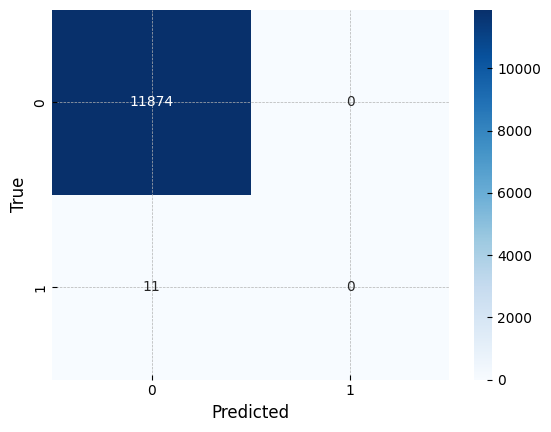

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#From the matrix we deduce the following parameter values:

In [ ]:
TP=11874
TN=0
FP=0
FN=11
total = 11874+11

From these values, we would calculate several evaluation metrics to assess the performance of our model:

In [ ]:
Accuracy= (TP+TN)/total
Accuracy

0.999074463609592

Our model has achieved a very high level of overall correctness in its predictions. It is accurately classifying the majority of the samples, which is a positive outcome.

In [ ]:
Precision= TP /(TP+FP)
Precision

1.0

A value of 1 suggests that our model has a perfect precision score, meaning that it correctly predicts all positive samples without any false positives. This indicates that when our model predicts a positive outcome, it is highly reliable.

In [ ]:
Recall= TP /(TP+FN)
Recall

0.999074463609592

Our model has a very high recall score, meaning that it captures almost all of the actual positive samples correctly. It has a low false negative rate.

In [ ]:
F1_Score= 2 * (Precision * Recall) / (Precision + Recall)
F1_Score

0.9995370175512438

Its suggests that our model performs well in terms of both precision and recall, balancing the trade-off between them.

Overall, according to what is taught in the course. From these results it can be concluded that the model suffers from overfitting to the data it was trained on. When we put additional data into the model there is a high probability that it will predict incorrect results.

First of all, we wanted to say that the work was very educational and we enjoyed doing it! The data we are working with is the most complex we have encountered so far. We were required to understand the data in a significant way in order to understand what cleaning and processing operations were required for it and what we performed on the data. The algorithms we used to select the most significant columns for predicting the target variable predicted roughly the same columns, which made us comfortable with their selection. We note that choosing the number of criteria and the depth of the trees is an NP-hard problem to choose and we have to deal with it in real life as well. We then created pipelines to perform the process automatically. Later we used dimensional compression tools to find anomalies in the data. After choosing the learning model, we conducted an investigation of the model's accuracy indicators and drew conclusions.
We hope that when we use real data and not engineered data we can reach optimal results and conclusions without suffering from the overtraining phenomenon to make the world a better and safer place as well as save lives.